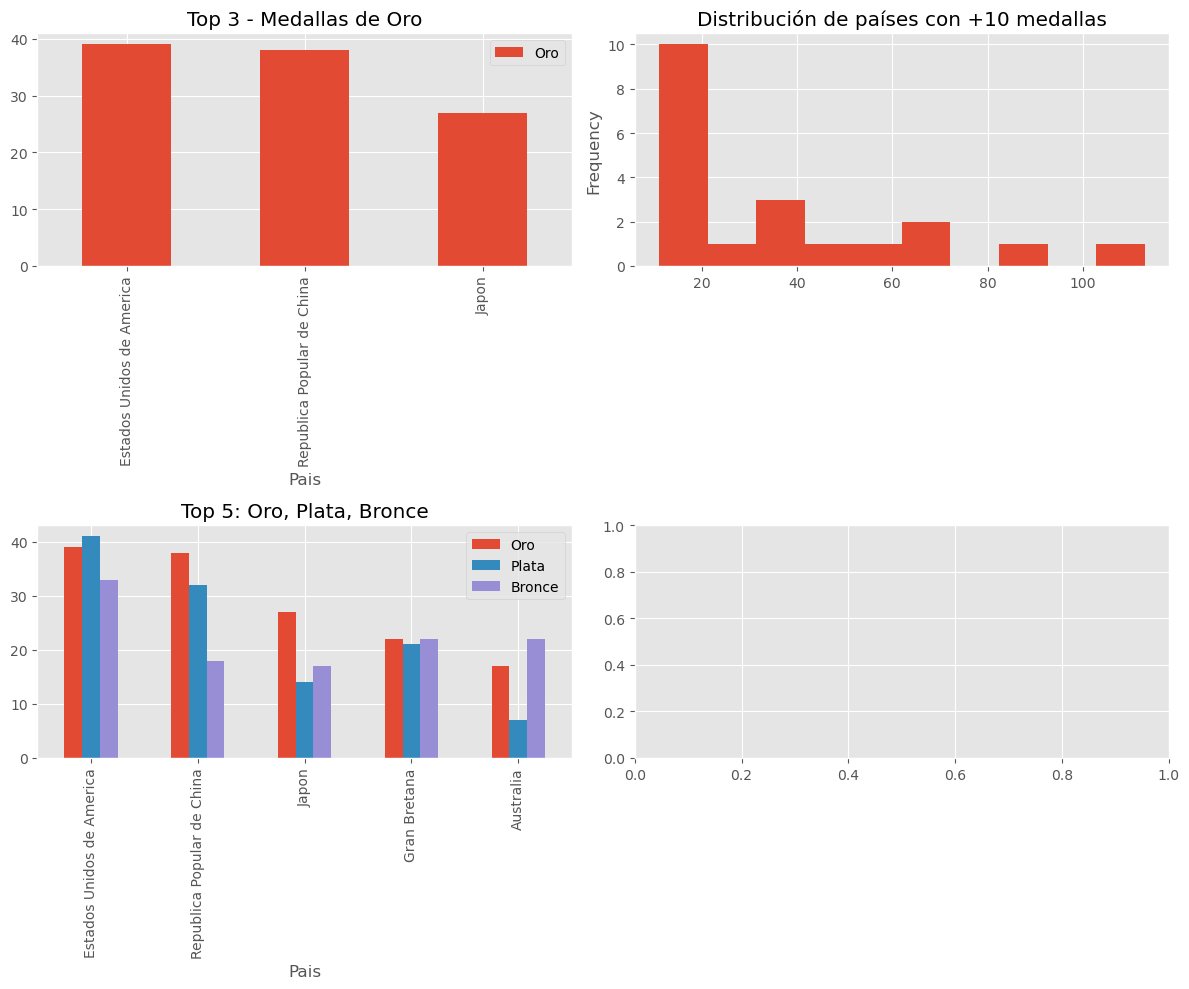

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

def cargar_datos(ruta: str) -> pd.DataFrame:
    """Carga y limpia los datos de medallas."""
    df = pd.read_csv(ruta)
    df = df.fillna(0)
    df[['Oro', 'Plata', 'Bronce']] = df[['Oro', 'Plata', 'Bronce']].astype(int)
    return df

def analizar_medallas(df: pd.DataFrame) -> dict:
    """Realiza análisis clave y genera métricas."""
    resultados = {
        'top_3_oro': df.nlargest(3, 'Oro'),
        'paises_mas_10_medallas': df[df['Total'] > 10].sort_values('Total', ascending=False),
        'medallas_totales_global': df['Total'].sum(),
        'top_5_combinado': df.nlargest(5, 'Total')
    }
    return resultados

def visualizar_datos(df: pd.DataFrame):
    """Crea gráficos para mostrar hallazgos."""
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Top 3 medallas de oro
    df.nlargest(3, 'Oro').plot.bar(x='Pais', y='Oro', ax=ax[0,0], title='Top 3 - Medallas de Oro')
    
    # Distribución de medallas totales
    df[df['Total'] > 10]['Total'].plot.hist(ax=ax[0,1], title='Distribución de países con +10 medallas')
    
    # Comparación oro-plata-bronce (top 5)
    df.set_index('Pais')[['Oro', 'Plata', 'Bronce']].nlargest(5, 'Oro').plot.bar(ax=ax[1,0], title='Top 5: Oro, Plata, Bronce')
    
    plt.tight_layout()
    plt.savefig('analisis_medallas.png', dpi=120)
    plt.show()

if __name__ == "__main__":
    # Cargar datos
    df = cargar_datos('C:/Users/jc629/OneDrive/CURSOS UDEMY/data analysis python/Pandas/medallas.csv')  # Archivo en misma carpeta
    
    # Análisis
    resultados = analizar_medallas(df)
    
    # Exportar resultados clave
    resultados['paises_mas_10_medallas'].to_csv('top_paises_medallas.csv', index=False)
    
    # Visualización
    visualizar_datos(df)